<a href="https://colab.research.google.com/github/shruthi-1/personalised-outfit-with-ai/blob/main/miniproject01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing packages and uploading the image

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io


In [ ]:
# Load the face detector and shape predictor models
#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
#!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [ ]:
# Function to get the average color by averaging pixel values in the region
def get_average_color(image, region):
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [region], 255)
    mean = cv2.mean(image, mask=mask)[:3]
    return tuple(map(int, mean))

In [ ]:
print("choose image to upload ")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

choose image to upload 


Saving WhatsApp Image 2024-12-01 at 21.33.28_1c6ce036.jpg to WhatsApp Image 2024-12-01 at 21.33.28_1c6ce036.jpg


Forehead Color:  (137, 157, 207)
Nose Color:  (118, 129, 175)
Left Cheek Color:  (98, 117, 165)
Right Cheek Color:  (109, 126, 173)
Lips Color:  (72, 74, 121)
Left Eye Color:  (77, 79, 99)
Right Eye Color:  (83, 84, 103)
 Eye Color:  (83, 86, 108)
Face Color:  (109, 124, 171)


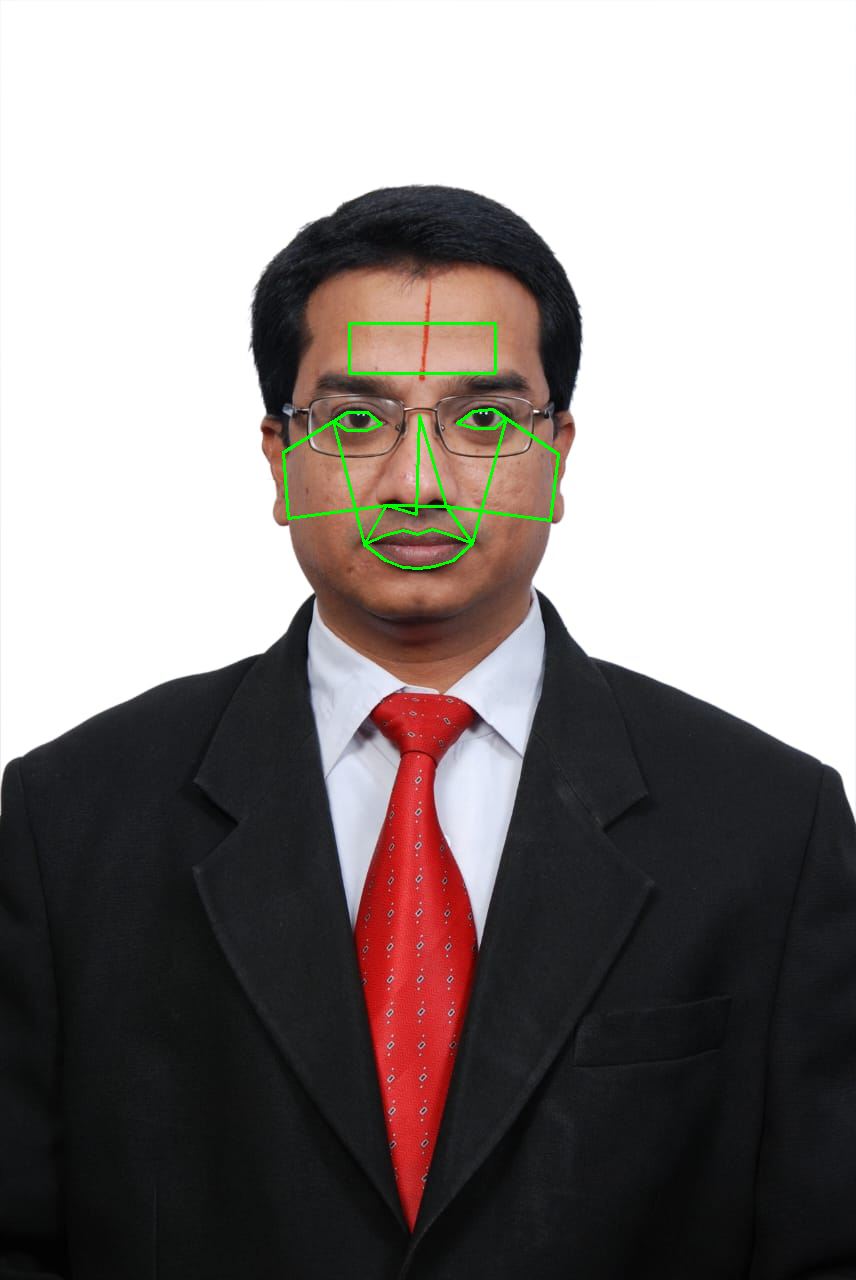

In [ ]:
if image is not None:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Define regions based on landmarks
        forehead = np.array([(landmarks.part(19).x, landmarks.part(19).y),
                             (landmarks.part(24).x, landmarks.part(24).y),
                             (landmarks.part(24).x, landmarks.part(24).y - 50),
                             (landmarks.part(19).x, landmarks.part(19).y - 50)])

        nose = np.array([(landmarks.part(27).x, landmarks.part(27).y),
                         (landmarks.part(33).x, landmarks.part(33).y),
                         (landmarks.part(31).x, landmarks.part(31).y),
                         (landmarks.part(35).x, landmarks.part(35).y)])

        left_cheek = np.array([(landmarks.part(1).x, landmarks.part(1).y),
                               (landmarks.part(3).x, landmarks.part(3).y),
                               (landmarks.part(31).x, landmarks.part(31).y),
                               (landmarks.part(48).x, landmarks.part(48).y),
                               (landmarks.part(36).x, landmarks.part(36).y)])

        right_cheek = np.array([(landmarks.part(15).x, landmarks.part(15).y),
                                (landmarks.part(13).x, landmarks.part(13).y),
                                (landmarks.part(35).x, landmarks.part(35).y),
                                (landmarks.part(54).x, landmarks.part(54).y),
                                (landmarks.part(45).x, landmarks.part(45).y)])

        lips = np.array([(landmarks.part(48).x, landmarks.part(48).y),
                         (landmarks.part(49).x, landmarks.part(49).y),
                         (landmarks.part(50).x, landmarks.part(50).y),
                         (landmarks.part(51).x, landmarks.part(51).y),
                         (landmarks.part(52).x, landmarks.part(52).y),
                         (landmarks.part(53).x, landmarks.part(53).y),
                         (landmarks.part(54).x, landmarks.part(54).y),
                         (landmarks.part(55).x, landmarks.part(55).y),
                         (landmarks.part(56).x, landmarks.part(56).y),
                         (landmarks.part(57).x, landmarks.part(57).y),
                         (landmarks.part(58).x, landmarks.part(58).y),
                         (landmarks.part(59).x, landmarks.part(59).y)])

        left_eye = np.array([(landmarks.part(36).x, landmarks.part(36).y),
                         (landmarks.part(37).x, landmarks.part(37).y),
                         (landmarks.part(38).x, landmarks.part(38).y),
                         (landmarks.part(39).x, landmarks.part(39).y),
                         (landmarks.part(40).x, landmarks.part(40).y),
                         (landmarks.part(41).x, landmarks.part(41).y)])

        right_eye = np.array([(landmarks.part(42).x, landmarks.part(42).y),
                          (landmarks.part(43).x, landmarks.part(43).y),
                          (landmarks.part(44).x, landmarks.part(44).y),
                          (landmarks.part(45).x, landmarks.part(45).y),
                          (landmarks.part(46).x, landmarks.part(46).y),
                          (landmarks.part(47).x, landmarks.part(47).y)])

        # Get the average color of each region
        forehead_color = get_average_color(image, forehead)
        nose_color = get_average_color(image, nose)
        left_cheek_color = get_average_color(image, left_cheek)
        right_cheek_color = get_average_color(image, right_cheek)
        lips_color = get_average_color(image, lips)
        left_eye_color = get_average_color(image, left_eye)
        right_eye_color = get_average_color(image, right_eye)
        eye_color = get_average_color(image,  np.concatenate([left_eye, right_eye]))
        face_color = get_average_color(image, np.concatenate([forehead, nose, left_cheek, right_cheek, lips, left_eye, right_eye]))
        # Print the color codes
        print("Forehead Color: ", forehead_color)
        print("Nose Color: ", nose_color)
        print("Left Cheek Color: ", left_cheek_color)
        print("Right Cheek Color: ", right_cheek_color)
        print("Lips Color: ", lips_color)
        print("Left Eye Color: ", left_eye_color)
        print("Right Eye Color: ", right_eye_color)
        print(" Eye Color: ", eye_color)
        print("Face Color: ", face_color)


        #Display regions on the image
        for region in [forehead, nose, left_cheek, right_cheek, lips, left_eye , right_eye]:
            cv2.polylines(image, [region], isClosed=True, color=(0, 255, 0), thickness=2)
        cv2_imshow(image)
else:
    print("No image to process")

Forehead Color:  (207, 157, 137)
Nose Color:  (175, 129, 118)
Left Cheek Color:  (165, 117, 98)
Right Cheek Color:  (173, 126, 109)
Lips Color:  (121, 74, 72)
Left Eye Color:  (99, 79, 77)
Right Eye Color:  (103, 84, 83)
 Eye Color:  (108, 86, 83)
Face Color:  (171, 124, 109)


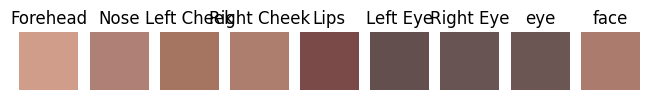

In [ ]:
# Convert BGR to RGB for analysis
forehead_color = forehead_color[::-1]
nose_color = nose_color[::-1]
left_cheek_color = left_cheek_color[::-1]
right_cheek_color = right_cheek_color[::-1]
lips_color = lips_color[::-1]
left_eye_color = left_eye_color[::-1]
right_eye_color = right_eye_color[::-1]
eye_color = eye_color[::-1]
face_color = face_color[::-1]
 # Print the color codes
print("Forehead Color: ", forehead_color)
print("Nose Color: ", nose_color)
print("Left Cheek Color: ", left_cheek_color)
print("Right Cheek Color: ", right_cheek_color)
print("Lips Color: ", lips_color)
print("Left Eye Color: ", left_eye_color)
print("Right Eye Color: ", right_eye_color)
print(" Eye Color: ", eye_color)
print("Face Color: ", face_color)

# Color list and labels
colors = [forehead_color, nose_color, left_cheek_color, right_cheek_color, lips_color,left_eye_color, right_eye_color , eye_color, face_color]
labels = ["Forehead", "Nose", "Left Cheek", "Right Cheek", "Lips","Left Eye", "Right Eye", "eye", "face" ]

# Function to display color palette
def display_color_palette(colors, labels):
    plt.figure(figsize=(8, 2))
    for i, color in enumerate(colors):
        plt.subplot(1, len(colors), i + 1)
        plt.imshow([[color]])
        plt.axis("off")
        plt.title(labels[i])
    plt.show()

display_color_palette(colors, labels)


In [ ]:
import colorsys

def get_dominant_color_season(colors):
    """Determines the dominant color season based on extracted facial colors.

    Args:
        colors (list): A list of RGB tuples representing extracted facial colors.

    Returns:
        str: The dominant color season (Spring, Summer, Autumn, Winter).
    """

    # Calculate average color values
    avg_r = sum(c[0] for c in colors) / len(colors)
    avg_g = sum(c[1] for c in colors) / len(colors)
    avg_b = sum(c[2] for c in colors) / len(colors)

    # Convert RGB to HLS
    h, l, s = colorsys.rgb_to_hls(avg_r / 255.0, avg_g / 255.0, avg_b / 255.0)

    # Determine dominant season based on HLS values
    if l > 0.5 and s < 0.5:
        if h < 60 / 360.0 or h > 300 / 360.0:
            return "Spring"  # Warm and light
        else:
            return "Summer"  # Cool and light
    else:
        if h < 60 / 360.0 or h > 300 / 360.0:
            return "Autumn"  # Warm and deep
        else:
            return "Winter"  # Cool and deep


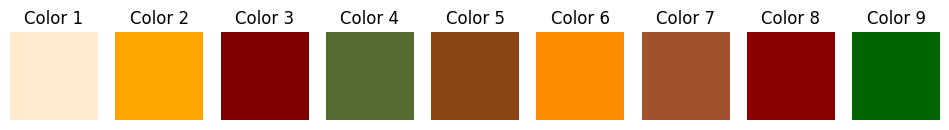

Dominant Color Season: Autumn


In [ ]:
def get_color_palette(season):
    """Returns a color palette based on the given season.

    Args:
        season (str): The dominant color season (Spring, Summer, Autumn, Winter).

    Returns:
        list: A list of RGB tuples representing the color palette.
    """

    if season == "Spring":
        return [
            (255, 228, 181),  # Light Peach
            (255, 160, 122),  # Coral
            (255, 215, 0),    # Golden Yellow
            (127, 255, 212),  # Light Turquoise
            (255, 192, 203),  # Light Pink
            (152, 251, 152),  # Light Green
            (255, 105, 180),  # Hot Pink (Dark Spring)
            (255, 140, 0),    # Dark Orange (Dark Spring)
            (0, 100, 0)       # Dark Green (Dark Spring)
        ]
    elif season == "Summer":
        return [
            (230, 230, 250),  # Lavender
            (255, 192, 203),  # Rose Pink
            (173, 216, 230),  # Powder Blue
            (211, 211, 211),  # Light Gray
            (176, 196, 222),  # Light Steel Blue
            (240, 248, 255),  # Alice Blue
            (135, 206, 250),  # Light Sky Blue (Dark Summer)
            (128, 128, 128),  # Gray (Dark Summer)
            (70, 130, 180)    # Steel Blue (Dark Summer)
        ]
    elif season == "Autumn":
        return [
            (255, 235, 205),  # Blanched Almond
            (255, 165, 0),    # Orange
            (128, 0, 0),      # Maroon
            (85, 107, 47),    # Dark Olive Green
            (139, 69, 19),    # Saddle Brown
            (255, 140, 0),    # Dark Orange
            (160, 82, 45),    # Sienna
            (139, 0, 0) ,      # Dark Red (Dark Autumn)
            (0, 100, 0)       # Dark Green (Dark Autumn)
        ]
    elif season == "Winter":
        return [
            (0, 0, 128),      # Navy Blue
            (0, 100, 0),      # Dark Green
            (128, 0, 128),    # Purple
            (0, 0, 0),        # Black
            (255, 255, 255),  # White
            (139, 0, 0),      # Dark Red
            (178, 34, 34),    # Firebrick
            (47, 79, 79) ,     # Dark Slate Gray (Dark Winter)
            (25, 25, 112)     # Midnight Blue (Dark Winter)
        ]
    else:
        return []  # Return empty list for invalid season

# Example usage:
dominant_season = get_dominant_color_season([forehead_color, nose_color, left_cheek_color, right_cheek_color, lips_color, left_eye_color, right_eye_color])
color_palette = get_color_palette(dominant_season)

# Display the palette
plt.figure(figsize=(12, 2))  # Increased figure size for more colors
for i, color in enumerate(color_palette):
    plt.subplot(1, len(color_palette), i + 1)  # Added closing parenthesis
    plt.imshow([[color]])
    plt.axis("off")
    plt.title(f"Color {i + 1}")
plt.show()
print(f"Dominant Color Season: {dominant_season}")

In [ ]:
import pandas as pd
from IPython.display import display, HTML, Javascript
from google.colab.output import eval_js

def get_user_info_with_dropdown():
    """Displays dropdown menus for body type and gender selection."""
    display(HTML('''
    <div style="display: flex; justify-content: center; align-items: center; height: 100vh; font-family: Arial, sans-serif;">
        <div style="border: 1px solid #ccc; border-radius: 10px; padding: 20px; width: 300px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
            <h3 style="text-align: center;">User Information</h3>
            <label for="bodyType">Select Body Type:</label>
            <select id="bodyType" style="width: 100%; padding: 8px; margin-bottom: 20px; border-radius: 5px; border: 1px solid #ccc;">
                <option value="" disabled selected>Choose...</option>
                <option value="Hourglass">Hourglass</option>
                <option value="Pear">Pear</option>
                <option value="Rectangle">Rectangle</option>
                <option value="Apple">Apple</option>
            </select>
            <label for="gender">Select Gender:</label>
            <select id="gender" style="width: 100%; padding: 8px; margin-bottom: 20px; border-radius: 5px; border: 1px solid #ccc;">
                <option value="" disabled selected>Choose...</option>
                <option value="Male">Male</option>
                <option value="Female">Female</option>
            </select>
            <button onclick="submitUserInfo()" style="width: 100%; padding: 10px; background-color: #4CAF50; color: white; border: none; border-radius: 5px; cursor: pointer;">Submit</button>
        </div>
    </div>
    <script>
        function submitUserInfo() {
            var bodyType = document.getElementById("bodyType").value;
            var gender = document.getElementById("gender").value;
            if (!bodyType || !gender) {
                alert("Please select both body type and gender!");
            } else {
                google.colab.kernel.invokeFunction('user_info_callback', [bodyType, gender], {});
                document.body.innerHTML = "<h3 style='text-align: center; color: green;'>Thank you! Your selection has been submitted.</h3>";
            }
        }
    </script>
    '''))

    # Callback to capture the user info
    def user_info_callback(body_type, gender):
        global user_info
        user_info = {"body_type": body_type, "gender": gender}

    # Register the callback
    output.register_callback('user_info_callback', user_info_callback)

    # Wait for the user to select values
    while not globals().get("user_info", None):
        pass  # Keep waiting until user info is set

    return user_info



# Run the dropdown-based input and show recommendations
user_info = get_user_info_with_dropdown()
print(user_info)


{'body_type': 'Pear', 'gender': 'Male'}


In [ ]:
def wait_for_key_press_colab(key_to_wait_for):
    """
    Waits for a specific key to be pressed using user input.

    Args:
        key_to_wait_for: The key to wait for (e.g., 'space', 'enter', 'esc').
    """
    print(f"Press the '{key_to_wait_for}' key:")
    while True:
        user_input = input("Press the key: ").strip().lower()

        # Map common keys like 'enter' and 'space' to text input
        if key_to_wait_for == "enter" and user_input == "":
            print(f"'{key_to_wait_for}' key pressed!")
            break
        elif key_to_wait_for == "space" and user_input == " ":
            print(f"'{key_to_wait_for}' key pressed!")
            break
        elif user_input == key_to_wait_for:
            print(f"'{key_to_wait_for}' key pressed!")
            break
        else:
            print(f"Incorrect key! Waiting for '{key_to_wait_for}'.")

# Example usage
wait_for_key_press_colab("space")


Press the 'space' key:
Press the key:      
Incorrect key! Waiting for 'space'.
Press the key: space
'space' key pressed!


In [ ]:
import pandas as pd
from IPython.display import HTML, display

def recommend_outfits(user_info, dominant_season):
    """Recommends outfits based on user input and dominant season."""

    # Load the outfit data from the CSV file
    df = pd.read_csv("data.csv")  # Replace with your actual file name

    # Filter the data based on user inputs and dominant season
    filtered_df = df[
        (df['Body Type'] == user_info['body_type']) &
        (df['Gender'] == user_info['gender']) &
        (df['Color Palette'] == dominant_season)
    ]

    # If no matching outfits are found
    if filtered_df.empty:
        return "<h2>No matching outfits found. Try changing preferences!</h2>"

    # Generate HTML content
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Outfit Recommendations</title>
        <style>
            body {{
                font-family: 'Roboto', sans-serif;
                background-color: #f4f4f4;
                margin: 0;
                padding: 0;
            }}
            h1 {{
                text-align: center;
                color: #333;
                margin: 20px 0;
            }}
            .outfit-recommendations {{
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
                gap: 20px;
                padding: 20px;
            }}
            .outfit {{
                border: 1px solid #ddd;
                background-color: #fff;
                padding: 20px;
                box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
                transition: transform 0.2s;
            }}
            .outfit:hover {{
                transform: translateY(-5px);
            }}
            .outfit h2 {{
                font-size: 1.2em;
                color: #333;
                margin: 0 0 10px;
            }}
            .outfit p {{
                margin: 5px 0;
                color: #555;
            }}
        </style>
    </head>
    <body>
        <h1>Outfit Recommendations for {dominant_season} ({user_info['body_type']} - {user_info['gender']})</h1>
        <div class="outfit-recommendations">
    """

    # Add each outfit recommendation
    for index, row in filtered_df.iterrows():
        html_content += f"""
            <div class="outfit">
                <h2>Outfit {index + 1}</h2>
                <p><strong>Top:</strong> {row['Top']}</p>
                <p><strong>Bottom:</strong> {row['Bottom']}</p>
                <p><strong>Accessory:</strong> {row['Accessory']}</p>
                <p><strong>Shoe:</strong> {row['Shoe']}</p>
                <p><strong>Occasion:</strong> {row['Occasion']}</p>
                <p><strong>Weather:</strong> {row['Weather']}</p>
                <p><strong>Fabric Type:</strong> {row['Fabric Type']}</p>
            </div>
        """

    # Close HTML tags
    html_content += """
        </div>
    </body>
    </html>
    """

    return html_content

# Integration with dropdown-based input and save recommendations to HTML
try:
    # Generate HTML recommendations
    html_output = recommend_outfits(user_info, dominant_season)

    # Save to HTML file
    with open("outfit_recommendations.html", "w") as file:
        file.write(html_output)

    print("Outfit recommendations saved to 'outfit_recommendations.html'.")
    display(HTML("<h3>Your outfit recommendations are ready!</h3>"))
except Exception as e:
    print(f"Error: {e}")


Outfit recommendations saved to 'outfit_recommendations.html'.
